In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

c:\Users\luisl\anaconda3\envs\PythonData\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Business Questions:


Descriptive Analytics

    Sales Analysis: What are the total sales for each product category across different channels and regions? This involves summarizing current sales data to understand what products are performing well.
    Customer Segmentation: How do customers differ in their spending across different product categories? This can involve cluster analysis to identify different types of customers based on their purchasing patterns.
    Market Analysis: What are the differences in purchasing patterns across regions? Are there specific product categories that are more popular in certain regions?

Inferential Analytics

    Comparative Analysis: Is there a significant difference in the average spending on different product categories between the two channels? This could involve hypothesis testing to compare means across groups.
    Association Rules: Are there certain products that are frequently bought together? This could involve using market basket analysis to find associations between different products.
    Regional Preferences: Are there significant differences in purchasing habits across different regions? This could involve statistical tests to compare regional data.

Predictive Analytics

    Sales Forecasting: Can we predict future sales for each product category based on historical data? This would involve using time series analysis or machine learning models for sales forecasting.
    Customer Spending Prediction: Can we predict how much a new customer will spend in each category based on their demographics or initial purchases? This involves building a predictive model.
    Churn Prediction: Can we predict which customers are likely to stop buying (churn) based on their purchasing patterns? This involves identifying patterns that precede churn and building a predictive model.

In [2]:
df = pd.read_csv('wholesale.csv')
df.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776


## Descriptive Statistics

## Probability

## Sampling Distributions

<Figure size 432x504 with 0 Axes>

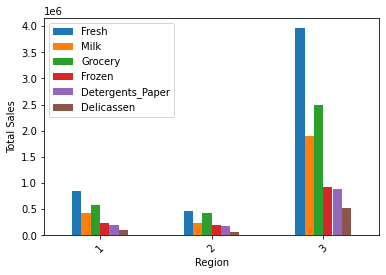

In [29]:
plt.figure(figsize=(6,7))
df.groupby('Region')[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']].sum().plot(kind='bar')
plt.xticks(rotation = 45)
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show();

In [25]:
df.groupby('Region')[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']].sum()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Region,,,,,,
1,854833,422454,570037,231026,204136,104327
2,464721,239144,433274,190132,173311,54506
3,3960577,1888759,2495251,930492,890410,512110


In [35]:
fresh_mean = df['Fresh'].mean()
fresh_sd = df['Fresh'].std()
fresh_mean, fresh_sd

(12000.297727272728, 12647.328865076894)

In [42]:
#Calculating shape and scale parameter
k_shape = fresh_mean**2 / fresh_sd**2
lambda_scale = fresh_sd / k_shape
k_shape,lambda_scale
# Recalculating with the correct understanding
variance_gamma = fresh_sd**2  # Variance is the square of the standard deviation

# Shape parameter (k)
k_gamma = fresh_mean**2 / variance_gamma

# Scale parameter (theta)
theta_gamma = variance_gamma / fresh_mean

(k_gamma, theta_gamma)



(0.9002982769251917, 13329.246578431324)

<AxesSubplot:xlabel='Fresh', ylabel='Count'>

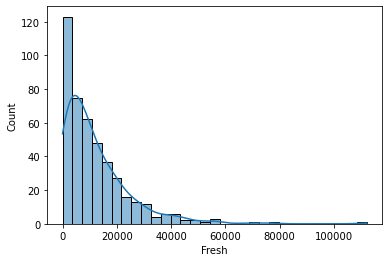

In [43]:
sns.histplot(df['Fresh'],kde= True)

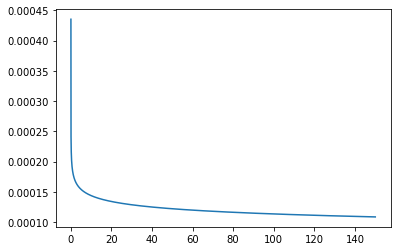

In [44]:
x = np.linspace (0, 150, 1000000) # This is creating the x-scale starting from 0 to 150 and simulating 10,000 samples
y = stats.gamma.pdf(x, a= k_gamma, scale=theta_gamma)#
plt.plot(x,y)

In [45]:
import numpy as np


# Number of samples per mean calculation and number of means to generate
num_samples_per_mean = 50
num_means = 10000

# Generate random samples and calculate means
means = [np.random.gamma(k_gamma, theta_gamma, num_samples_per_mean).mean() for _ in range(num_means)]


<AxesSubplot:ylabel='Count'>

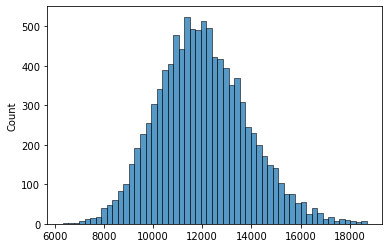

In [46]:
sns.histplot(means)
plt.show();

In [48]:
np.mean(means)

12006.421106780892

In [49]:
fresh_se = fresh_sd / np.sqrt(df['Fresh'].shape[0])


602.9377463368367

In [50]:
lower = fresh_mean - 1.96*fresh_se
upper = fresh_mean + 1.96*fresh_se
lower , upper

(10818.539744452528, 13182.055710092927)